# 卷积神经网络

In [56]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
# import seaborn as sn11sae
from sklearn.metrics import classification_report 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [57]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context#下载数据集

In [58]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.mnist.load_data()

In [59]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding="same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3),padding = "same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(1024,(3,3),padding = "same",activation="relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [60]:
# 设置优化器，损失函数和准确率测评标准
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",  
             metrics=["acc"])

In [61]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label = tf.keras.utils.to_categorical(test_label)

In [62]:
#训练模型
his = model.fit(train_image,train_label,epochs=5,batch_size=32,validation_data=(test_image,test_label))

Epoch 1/5
1875/1875 [==============================] - 386s 205ms/step - loss: 0.2971 - acc: 0.9159 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 2/5
1875/1875 [==============================] - 410s 219ms/step - loss: 0.0801 - acc: 0.9763 - val_loss: 0.0557 - val_acc: 0.9829
Epoch 3/5
1875/1875 [==============================] - 390s 208ms/step - loss: 0.0577 - acc: 0.9822 - val_loss: 0.0614 - val_acc: 0.9811
Epoch 4/5
1875/1875 [==============================] - 388s 207ms/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0615 - val_acc: 0.9795
Epoch 5/5
1875/1875 [==============================] - 344s 183ms/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0432 - val_acc: 0.9853


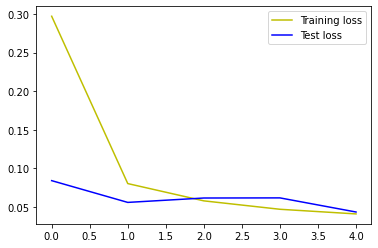

In [63]:
plt.plot(his.epoch,his.history.get("loss"),"y",label="Training loss")
plt.plot(his.epoch,his.history.get("val_loss"),"b",label="Test loss")
plt.legend()

In [64]:
pred = model.predict(test_image)

313/313 [==============================] - 21s 67ms/step


In [65]:
i = 24

In [66]:
np.argmax(pred[i])

4

In [67]:
np.argmax(test_label[i])

4

In [68]:
pred_ = np.argmax(pred,axis=1)
test_label = np.argmax(test_label,axis=1)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(test_label,pred_))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.96      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

